# Deep Learning Fundamentals: Robust Gradient Descent Implementation

## 1. Executive Summary
The previous snippet only showed the *update* step. To truly understand Gradient Descent, you must see the **Full Training Loop**. This robust implementation chains together four critical phases:
1.  **Initialization:** Creating random starting weights.
2.  **Forward Pass:** Making a prediction.
3.  **Cost Computation:** Checking "how wrong" the prediction is.
4.  **Backward Pass:** Calculating gradients to fix the error.
5.  **Update:** Nudging weights to reduce error.

## 2. Technical Deep Dive & Implementation

This script solves a non-linear classification problem (e.g., distinguishing red vs. blue dots in a spiral or circle).

### The Complete Code
Copy this into a Python file (e.g., `neural_network.py`) or Jupyter Notebook.



Generating Data...
Input Shape: (2, 400)
Target Shape: (1, 400)

Starting Training...
Cost after iteration 0: 0.692994
Cost after iteration 1000: 0.293994
Cost after iteration 2000: 0.073186
Cost after iteration 3000: 0.069477
Cost after iteration 4000: 0.067704


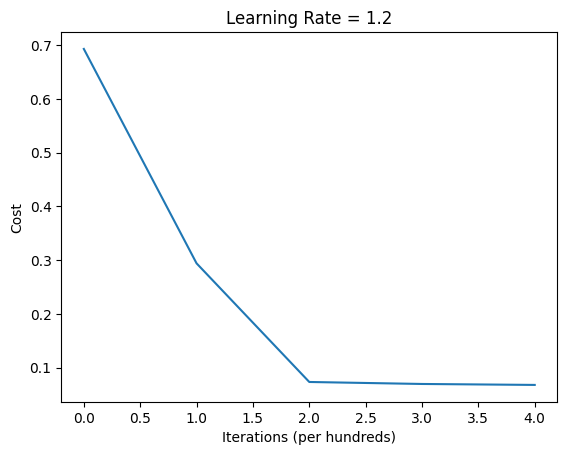


Training Complete! Check the plot window.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# --- HELPER FUNCTIONS ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of input layer
    n_h -- size of hidden layer
    n_y -- size of output layer
    """
    np.random.seed(2) # For reproducibility
    
    # 1. Random Initialization (Critical!)
    # Multiply by 0.01 to keep weights small (avoids Sigmoid saturation)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters
    
# Based on the context of the code, you likely mean **Iteration** (often confused with interaction).

# ### What is an Iteration?

# An **Iteration** is **one complete learning cycle** where the neural network updates its intelligence once.

# In the code, one iteration consists of exactly these 4 steps running once:

# 1. **Forward Prop:** The model makes a guess on the data.
# 2. **Compute Cost:** It calculates how wrong the guess was.
# 3. **Backprop:** It calculates which way to move the weights to fix the error.
# 4. **Update:** It nudges the weights () slightly in that direction.

# **Why do we need many?**
# Because the "Update" step is tiny (controlled by the learning rate). The model needs thousands of iterations (steps) to get from a "random guess" to a "good prediction."

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization)
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Layer 1 (Hidden: Tanh)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    # Layer 2 (Output: Sigmoid)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost
    """
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = - np.sum(logprobs) / m
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    return cost

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions from above.
    """
    m = X.shape[1]
    
    # Retrieve W2 to use in calculating dZ1
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # --- OUTPUT LAYER GRADIENTS ---
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    # --- HIDDEN LAYER GRADIENTS ---
    # Derivative of Tanh: 1 - np.power(A1, 2)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update Rule
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# --- MAIN MODEL FUNCTION ---
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Integrates all functions to create a model
    """
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    # 1. Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    costs = [] # To keep track of cost
    
    # 2. Loop (Gradient Descent)
    for i in range(0, num_iterations):
         
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function
        cost = compute_cost(A2, Y)
        
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Gradient descent parameter update
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")
            costs.append(cost)
            
    # Plotting the Learning Curve
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title("Learning Rate = 1.2")
    plt.show()
    
    return parameters

# --- RUN IT ---
if __name__ == "__main__":
    # Create noisy moon data (Non-linear data)
    print("Generating Data...")
    X, Y = sklearn.datasets.make_moons(n_samples=400, noise=.2)
    # Transpose to match our notation (n_x, m) -> Columns are examples
    X, Y = X.T, Y.reshape(1, Y.shape[0])

    print(f"Input Shape: {X.shape}")
    print(f"Target Shape: {Y.shape}")
    print("\nStarting Training...")
    
    # Train model with 4 hidden units
    parameters = nn_model(X, Y, n_h=4, num_iterations=5000, print_cost=True)
    
    print("\nTraining Complete! Check the plot window.")